<a href="https://www.kaggle.com/code/ssathishkumar/icc-test-cricket-runs-eda-regression-model?scriptVersionId=97973912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import time
import seaborn as sns
import re
import random
import math
sns.set(style="darkgrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn import preprocessing
import datetime as dt
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)
img_fmt = 'svg'
plot_no = 1

In [2]:
df = pd.read_csv('/kaggle/input/icc-test-cricket-runs/ICC Test Batting Figures.csv',encoding= 'unicode_escape')
df.head()
df.info()
df.describe().T

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Player          3001 non-null   object
 1   Span            3001 non-null   object
 2   Mat             3001 non-null   int64 
 3   Inn             3001 non-null   object
 4   NO              3001 non-null   object
 5   Runs            3001 non-null   object
 6   HS              3001 non-null   object
 7   Avg             3001 non-null   object
 8   100             3001 non-null   object
 9   50              3001 non-null   object
 10  0               3001 non-null   object
 11  Player Profile  3001 non-null   object
dtypes: int64(1), object(11)
memory usage: 281.5+ KB


,count,mean,std,min,25%,50%,75%,max
Mat,3001.0,17.427191,24.954654,1.0,2.0,7.0,21.0,200.0


**Datatype corrections**

In [3]:
df.replace(to_replace='-',inplace=True)
df[["Mat", "Avg","Inn","Runs","100"]] = df[["Mat", "Avg","Inn","Runs","100"]].apply(pd.to_numeric)

Player            None
Span              None
Mat               None
Inn               None
NO                None
Runs              None
HS                None
Avg               None
100               None
50                None
0                 None
Player Profile    None
dtype: object

Top 20 players who has the best average sorted by their run aggregate

In [4]:
df[['Player', 'Country']] = df['Player'].str.split('(', 1, expand=True)
#remove 'ICC' from country
df.Country = df.Country.apply(lambda x: x.split(')')[0].replace('ICC/','').replace('/ICC',''))
df['years_played'] = df.Span.apply(lambda x: abs(eval(x)))
df['Debut_year'] = df.Span.apply(lambda x: int(str(x)[:4]))

# **EDA**

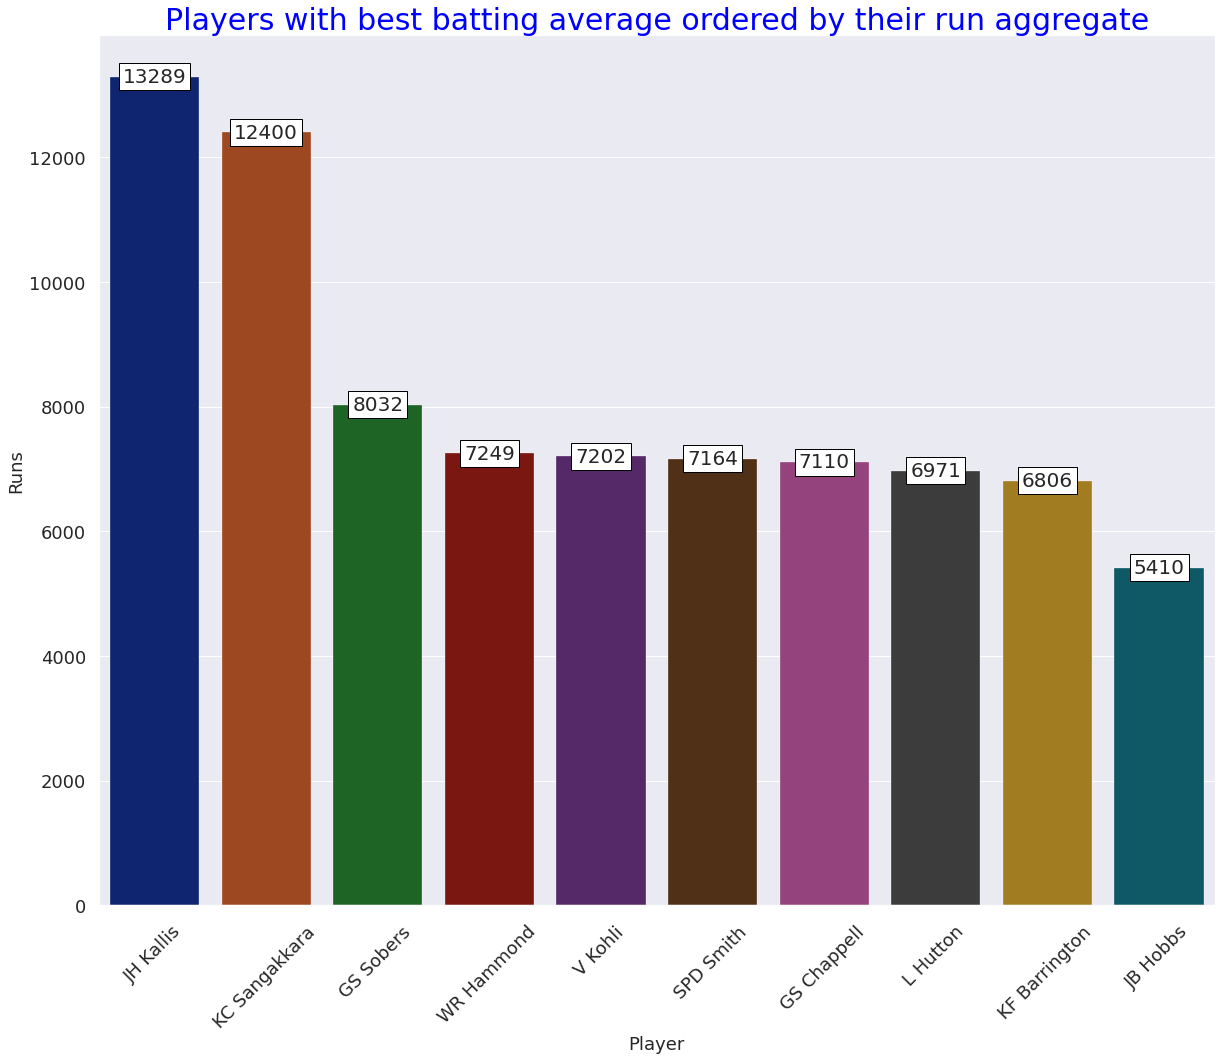

In [5]:
#filter the players who played 100+ matches and sort out the top n players with best average
df1 = df.query('Inn > 100').sort_values(by='Avg',ascending=False).head(10).sort_values(by='Runs',ascending=False)
_ = plt.subplots(figsize = (20,16))
_ = plt.xticks(rotation = 45)
_ = plt.title('Players with best batting average ordered by their run aggregate', color='blue', fontsize=30)
plots = sns.barplot(data = df1, x='Player',y = 'Runs', palette='dark')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(),'.0f'), 
                   (bar.get_x()+ bar.get_width()/2,bar.get_height())
                       , ha='center', va='center',
                   size=20, xytext=(0, 0),bbox=dict( fc="w", ec="black", lw=1),
                   textcoords='offset points')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

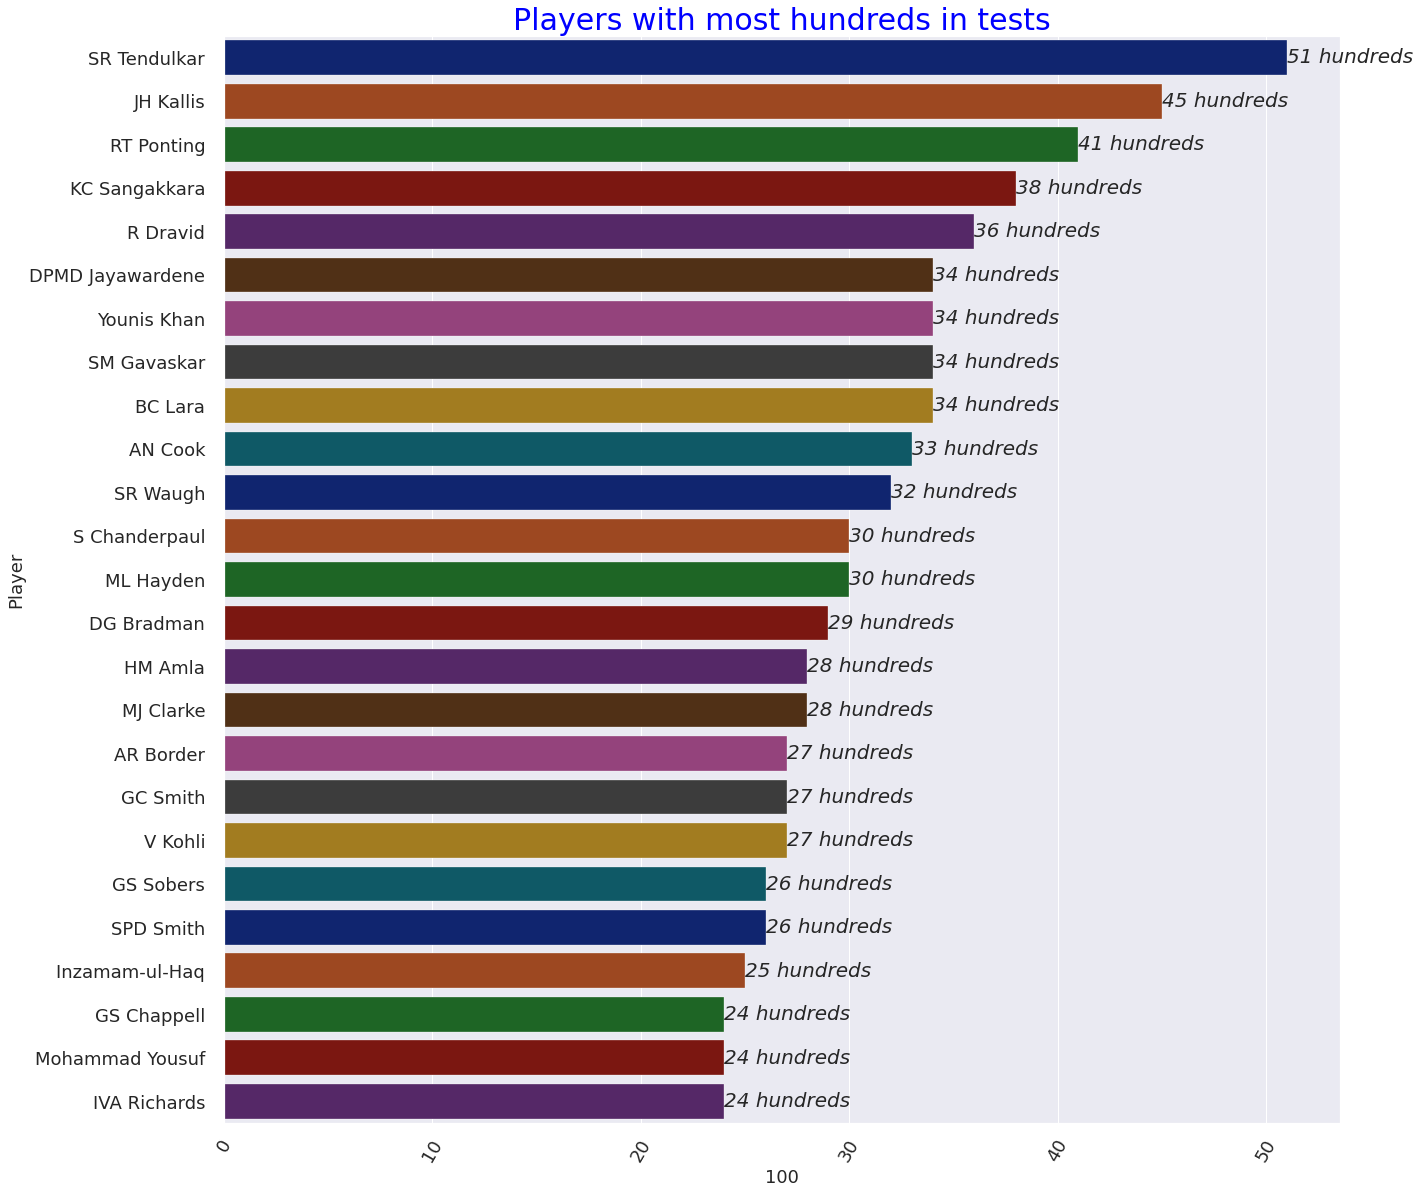

In [6]:
#filter the players who played 100+ matches and sort out the top n players with best average
df2 = df.sort_values(by='100',ascending=False).head(25)
_ = plt.subplots(figsize = (20,20))
_ = plt.xticks(rotation = 60)
_ = plt.title('Players with most hundreds in tests', color='blue', fontsize=30)
plots = sns.barplot(data = df2, y='Player',x = '100', palette='dark')
for bar in plots.patches:
    #print(bar.get_width(),(bar.get_verts()[0][1]-bar.get_verts()[2][1])/2)
    _ = plots.annotate(str(format(bar.get_width(), '.0f'))+' hundreds', 
                   (bar.get_width(),bar.get_y()+0.4),
                       ha='left', va='center',
                       size=20, xytext=(0, 0),
                       textcoords='offset points',
                       animated = True,
                       fontstyle = 'oblique')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

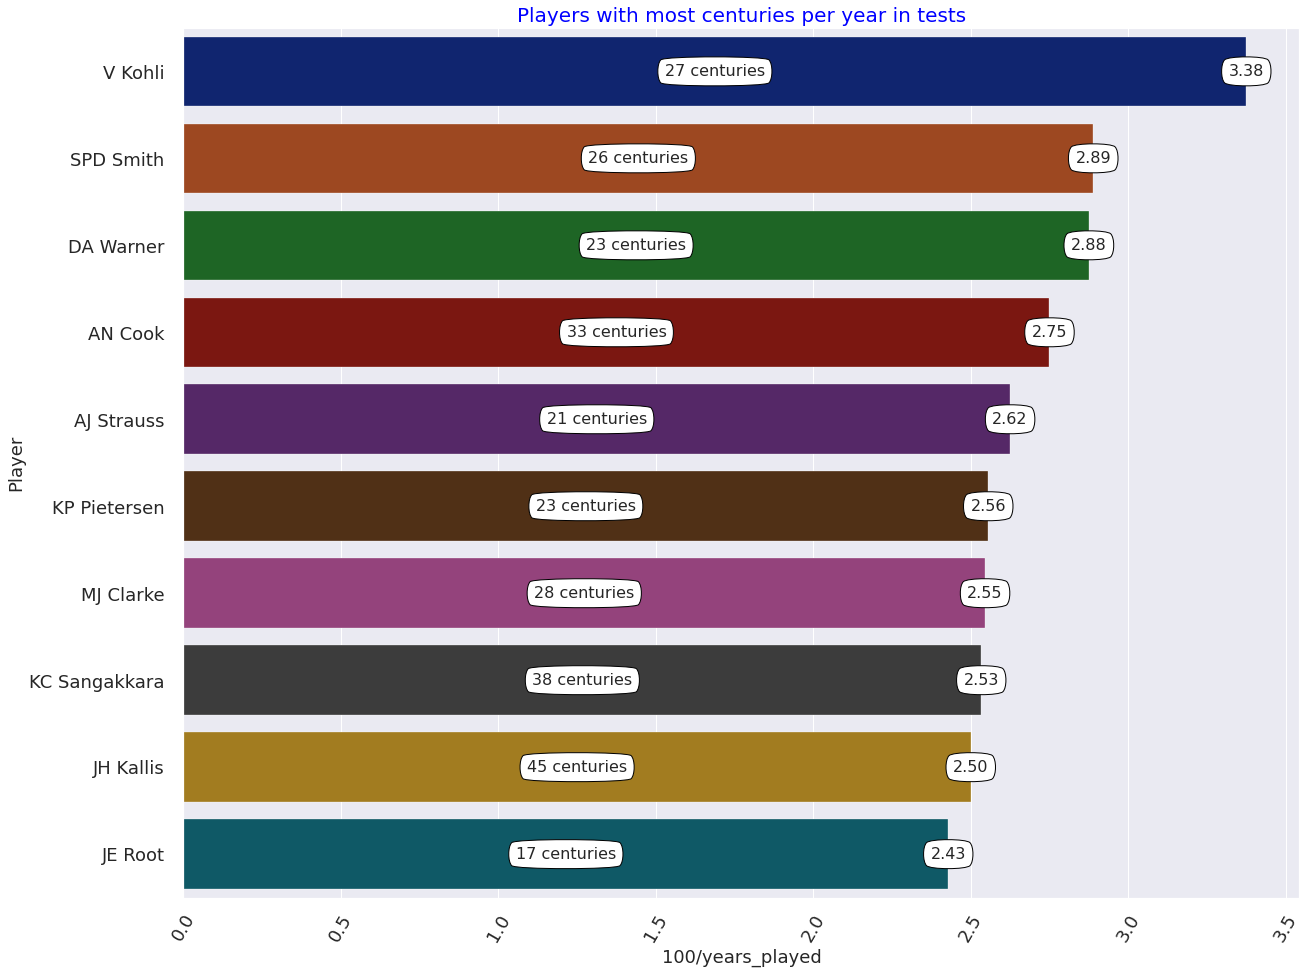

In [7]:
#average number of hundreds scored in a year
pd.set_option('mode.chained_assignment', None)
df3 = df[df['100']>10]
df3['100/years_played'] = df3.apply(lambda x: x['100']/x.years_played, axis = 1)
df3 = df3.sort_values(by = '100/years_played', ascending = False).head(10)
_ = plt.subplots(figsize = (20,16))
_ = plt.xticks(rotation = 60)
_ = plt.title('Players with most centuries per year in tests', color='blue', fontsize=20)
plots = sns.barplot(data = df3, y='Player',x = '100/years_played', palette='dark')
i = 0
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(),bar.get_y()+0.4)
                       , ha='center', va='center',
                   size=16, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
    _ = plots.annotate(str(df3.iloc[i,]['100'])+' centuries', 
                   (bar.get_width()/2,bar.get_y()+0.4)
                       , ha='center', va='center',
                   size=16, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
    i+=1
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

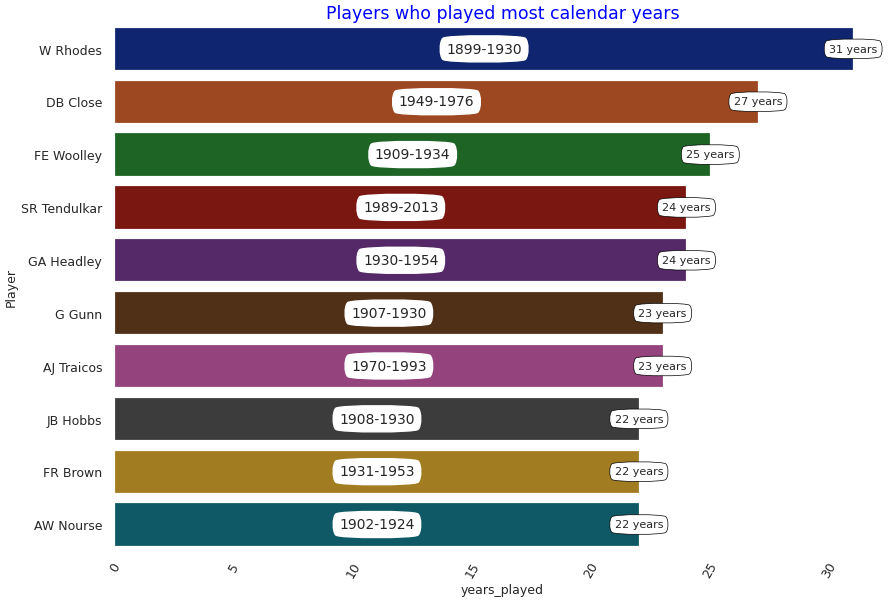

In [8]:
df4 = df.sort_values(by = 'years_played', ascending = False).head(10)
title = 'Players who played most calendar years'
_ = plt.subplots(figsize = (20,14), dpi = 50)
_ = plt.xticks(rotation = 60)
_ = plt.title(title, fontsize=25, color='blue')
plots = sns.barplot(data = df4, y='Player',x = 'years_played', palette='dark')
_ = plt.box(on=None)
i = 0
for bar in plots.patches:
    _ = plots.annotate(str(format(bar.get_width(), '.0f'))+' years', 
                   (bar.get_width(),bar.get_y()+0.4)
                       , ha='center', va='center',
                   size=16, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="black", lw=1),
                   textcoords='offset points')
    _ = plots.annotate(str(df4.iloc[i,]['Span']), 
                   (bar.get_width()/2,bar.get_y()+0.4)
                       , ha='center', va='center',
                   size=20, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.5", fc="w", ec="white", lw=2),
                   textcoords='offset points')
    i+=1
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

# **Preprocessing**

In [9]:
def df_preprocessing(df, var_index = -1):
    columns = ['Mat','Inn','NO','HS','Avg','100','50','0','Country','years_played','Debut_year']
    X = df[columns]
    X.HS = X.HS.apply(lambda x: str(x).replace('*',''))
    X[['100','50','0','NO','HS']] = X[['100','50','0','NO','HS']].astype('int64')
    y = df[['Runs']].to_numpy()
    le = preprocessing.LabelEncoder()
    le_data = le.fit_transform(df.Country)
    _ = le_data.reshape(-1,1)
    ohe = preprocessing.OneHotEncoder()
    X_new_data = ohe.fit_transform(le_data.reshape(-1,1)).toarray()
    X_new_cols = ohe.get_feature_names_out(['Country'])
    X[X_new_cols] = X_new_data
    X.drop(columns=['Country'],inplace = True)
    scaler = preprocessing.MinMaxScaler()
    X_new = scaler.fit_transform(X)
    if var_index != -1:
        return X_new[var_index],y[var_index]
    else:
        return X_new, y

# **Predicting runs using the existing data**

In [10]:
from sklearn.model_selection import train_test_split
X, y = df_preprocessing(df)
X_train, X_test,y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 31), (751, 31), (2250, 1), (751, 1))

# **Let us use Decision tree regressor to predict the total runs of a player**

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0,criterion =  "absolute_error")
scores = cross_val_score(regressor, X_test, y_test, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

0.96 accuracy with a standard deviation of 0.02


DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import plot_confusion_matrix
mae = mean_absolute_error(y_true = y_test,y_pred = y_pred)
mape = mean_absolute_percentage_error(y_true = y_test,y_pred = y_pred)
print('MAE: {:0.2f}\nMAPE: {:0.2f}'.format(mae,mape))

MAE: 101.69
MAPE: 0.16


In [13]:
def pred_runs():
    idx = random.randint(0,len(df))
    X1,y1 = df_preprocessing(df, idx)
    df_row = df.loc[idx]
    print(f'Actual Aggregate runs of {df_row.Player} is {df_row.Runs}')
    var_pred_runs = regressor.predict(X1.reshape(31,1).transpose())[0]
    print(f'Predicted Aggregate runs of {df_row.Player} is {var_pred_runs}\n')

In [14]:
for i in range(5):
    pred_runs()

Actual Aggregate runs of J Ryder  is 1394
Predicted Aggregate runs of J Ryder  is 1394.0

Actual Aggregate runs of DS de Silva  is 406
Predicted Aggregate runs of DS de Silva  is 485.0

Actual Aggregate runs of OR Dunell  is 42
Predicted Aggregate runs of OR Dunell  is 42.0

Actual Aggregate runs of KS Williamson  is 6379
Predicted Aggregate runs of KS Williamson  is 6379.0

Actual Aggregate runs of SN Thakur  is 4
Predicted Aggregate runs of SN Thakur  is 4.0

